# HW Supervised Learning Classification

### Agi Rahmawandi <br> Batch 57

## Telecommunication Customers Churn Prediction

### melakukan prediksi apakah suatu customer akan churn atau tidak.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [ ]:
df = pd.read_csv("dataset/Telecom_Customers_Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Exploratory Data Analysis (EDA)

### **Definisi masing-masing kolom**<br>
● Customerid: id dari customer<br>
● Gender: gender dari customer<br>
● Seniorcitizen: apakah merupakan senior citizen atau tidak<br>
● Partner: apakah memiliki partner atau tidak<br>
● Dependents: apakah memiliki tanggungan atau tidak seperti anak dll<br>
● Tenure: tenure dari langganan customer<br>
● PhoneService: apakah menggunakan layanan phone atau tidak<br>
● MultipleLines: apakah menggunakan multiple lines atau tidak<br>
● InternetService: Tipe dari internet service yang digunakan<br>
● OnlineSecurity: apakah menggunakan fitur online security<br>
● OnlineBackup: apakah menggunakan fitur online backup<br>
● DeviceProtection: apakah menggunakan fitur device protection<br>
● TechSupport: apakah menggunakan fitur tech support atau tidak<br>
● StreamingTV: apakah menggunakan fitur streaming TV atau tidak<br>
● StreamingMovies: apakah menggunakan fiture streaming film atau tidak<br>
● Contract: tipe contract dari customer<br>
● PaperlessBilling: apakah menggunakan fitur paperless billing atau tidak<br>
● PaymentMethod: payment tipe yang digunakan oleh customer<br>
● MonthlyCharges: total charges/biaya bulanan yang dibayarkan<br>
● TotalCharges: total charges secara keseluruhan yang dibayarkan<br>
● Churn: target variabel yang menunjukan bahwa customer churn atau tidak<br>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1. Berapa banyak perbandingan pelanggan yang melakukan churn dibanding tidak melakukan churn ?

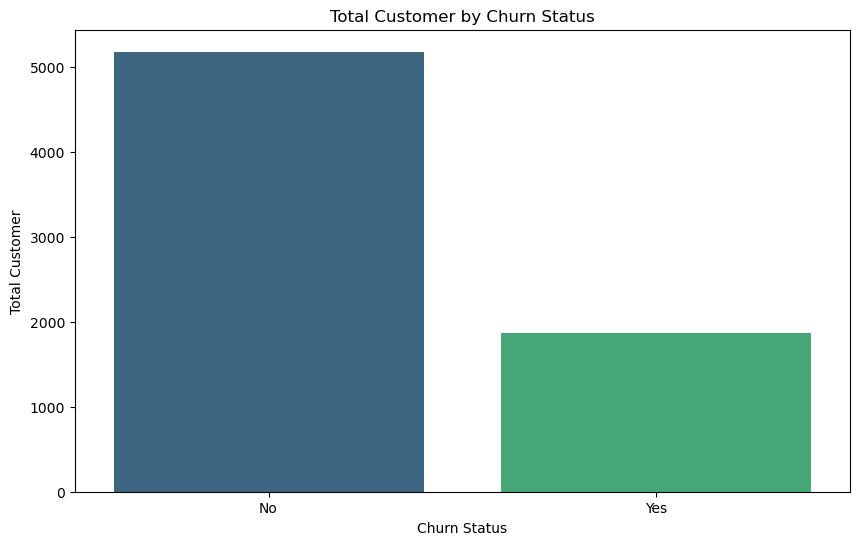

In [9]:
total_id = df.groupby('Churn')['customerID'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='customerID', data=total_id,hue='Churn', palette='viridis')
plt.title('Total Customer by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Customer')
plt.xticks(rotation=0)
plt.show()

### 2. Apakah besarnya MonthlyCharge mempengaruhi churn ?

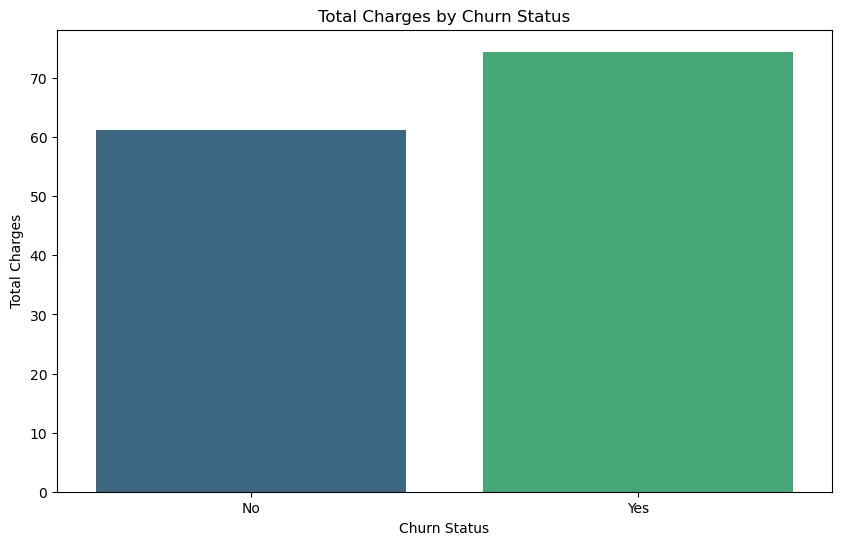

In [ ]:
total = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=total,hue='Churn', palette='viridis')
plt.title('MonthlyCharges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('MonthlyCharges')
plt.xticks(rotation=0)
plt.show()

### 3. Apakah ada perbedaan tingkat churn antara pelanggan senior citizen dan non-senior citizen?

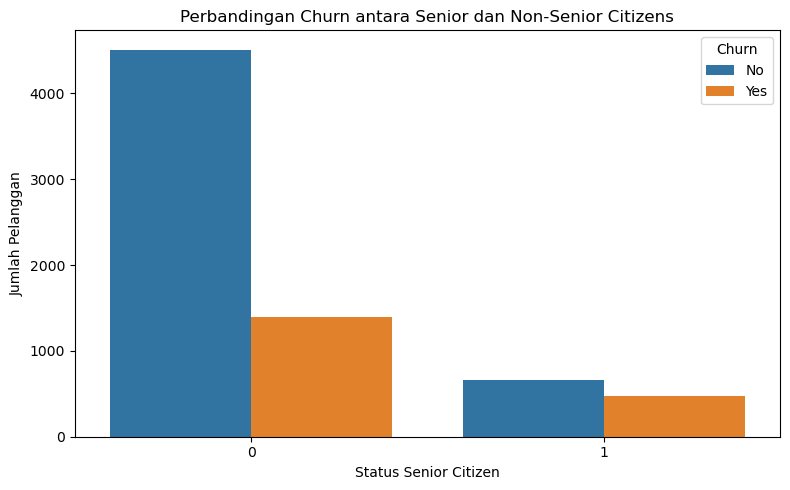

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Perbandingan Churn antara Senior dan Non-Senior Citizens')
plt.xlabel('Status Senior Citizen')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### 4. Apakah tingkat tenure mempengaruhi tingkat churn ?

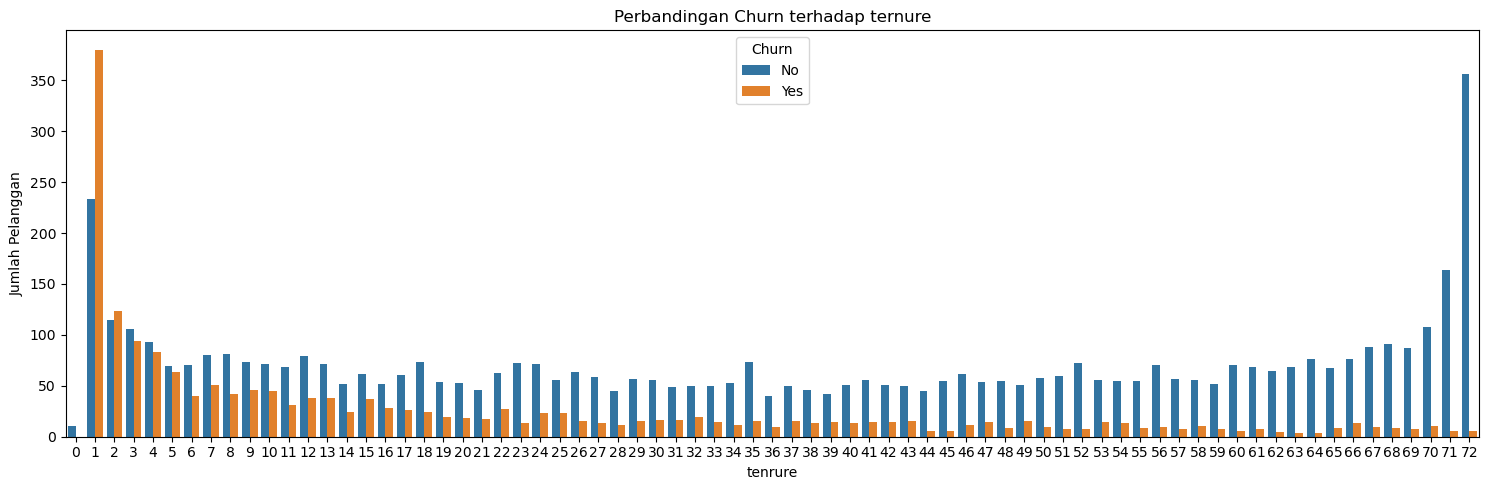

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='tenure', hue='Churn')
plt.title('Perbandingan Churn terhadap ternure')
plt.xlabel('tenrure')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### 5. Apakah ada perbedaan tingkat churn antara pelanggan yang menggunakan Internet Service Fiber Optic , dan yang tidak memakan internet service?

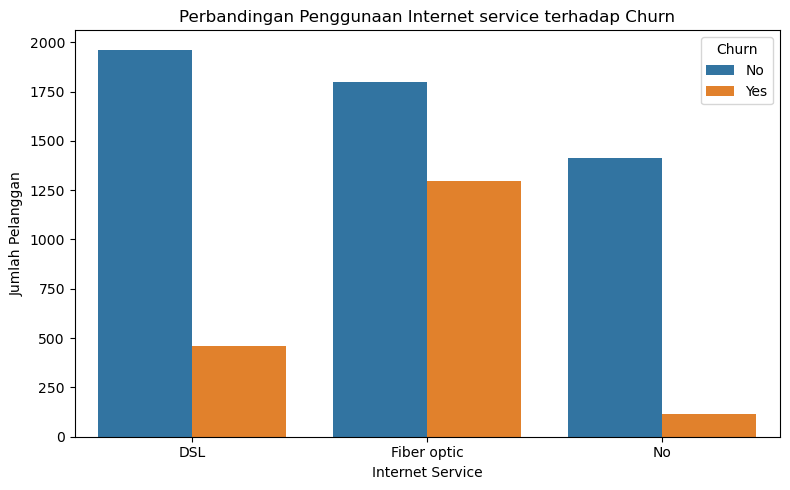

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Perbandingan Penggunaan Internet service terhadap Churn')
plt.xlabel('Internet Service')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [33]:
df[['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       1962
Fiber optic      No       1799
No               No       1413
Fiber optic      Yes      1297
DSL              Yes       459
No               Yes       113
Name: count, dtype: int64

### 6. Apakah perbedaan tingkat kontak memperngaruhi tingkat churn ?

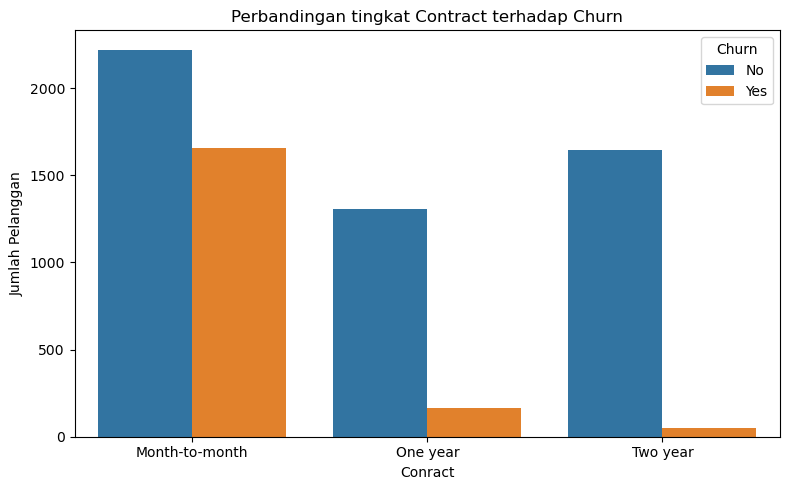

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Perbandingan tingkat Contract terhadap Churn')
plt.xlabel('Conract')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [35]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

### 7.Apakah payment methiod mempengaruhi tingkat churn ?

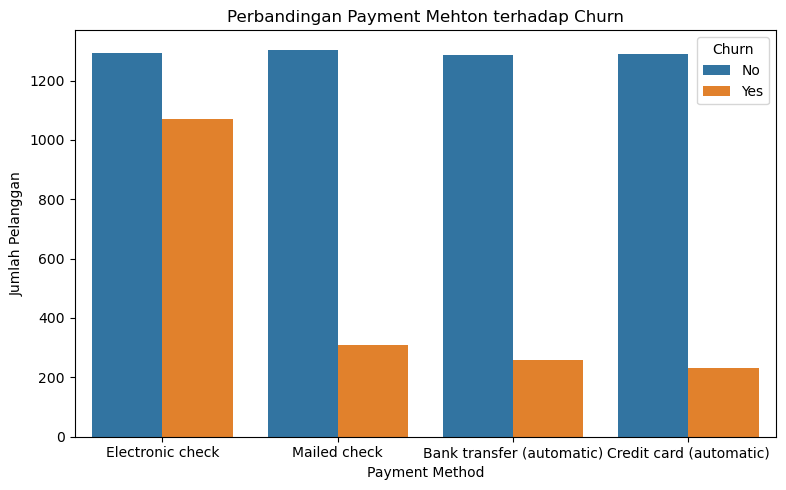

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Perbandingan Payment Mehton terhadap Churn')
plt.xlabel('Payment Method')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [37]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64